In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import csv

In [83]:
accident_path = "project_data/accident_df.csv"
atmospheric_cond_path = "project_data/atmospheric_cond_df.csv"
road_surface_cond_path = "project_data/road_surface_cond_df.csv"

accident_df = pd.read_csv(accident_path)
atmospheric_cond_df = pd.read_csv(atmospheric_cond_path)
road_surface_cond_df = pd.read_csv(road_surface_cond_path)



In [84]:
accident_df_new = accident_df[['ACCIDENT_NO','Accident Type Desc','SEVERITY','SPEED_ZONE']]
atmospheric_cond_df_new = atmospheric_cond_df[['ACCIDENT_NO','Atmosph Cond Desc']]
road_surface_cond_df_new = road_surface_cond_df[['ACCIDENT_NO','Surface Cond Desc']]

In [85]:
summary_df = pd.merge(pd.merge(accident_df_new,atmospheric_cond_df_new,on='ACCIDENT_NO'),road_surface_cond_df_new,on='ACCIDENT_NO')
summary_df

,ACCIDENT_NO,Accident Type Desc,SEVERITY,SPEED_ZONE,Atmosph Cond Desc,Surface Cond Desc
0,T20160000013,Struck Pedestrian,2,60,Clear,Dry
1,T20160000015,Collision with a fixed object,2,80,Clear,Dry
2,T20160000019,Collision with a fixed object,3,50,Clear,Dry
3,T20160000028,Collision with vehicle,3,60,Clear,Dry
4,T20160000031,No collision and no object struck,3,50,Clear,Dry
...,...,...,...,...,...,...
63554,T20200019239,Collision with vehicle,2,50,Clear,Dry
63555,T20200019247,Collision with a fixed object,2,999,Clear,Dry
63556,T20200019250,Collision with vehicle,2,60,Clear,Dry
63557,T20200019253,Vehicle overturned (no collision),2,80,Clear,Dry


In [86]:
summary_number = summary_df.groupby(['Atmosph Cond Desc']).count()
con_number = summary_number[['ACCIDENT_NO']]
con_number_sorted = con_number.sort_values(by='ACCIDENT_NO',ascending=False)

con_number_sorted

,ACCIDENT_NO
Atmosph Cond Desc,
Clear,49617
Raining,6291
Not known,5957
Strong winds,839
Fog,536
Dust,160
Smoke,110
Snowing,49


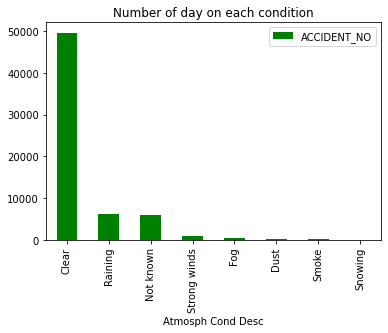

In [87]:
ax = con_number_sorted.plot(kind="bar",title ="Accident no. of each condition",facecolor="green")

In [88]:
#number of accident in poor weather conditions (drop clear day & not known days)
summary_drop_df = con_number_sorted.drop(labels=['Clear','Not known'],axis=0, inplace=False)
summary_drop_df

,ACCIDENT_NO
Atmosph Cond Desc,
Raining,6291
Strong winds,839
Fog,536
Dust,160
Smoke,110
Snowing,49


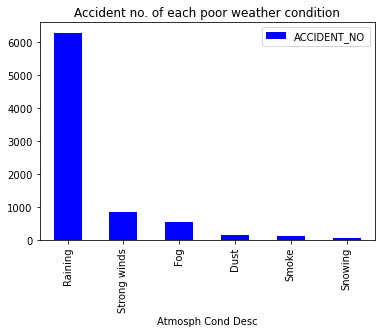

In [105]:
ax = summary_drop_df.plot(kind="bar",title ="Accident no. of each poor weather condition",facecolor="blue")



The Relationship Between Road Accident Severity and Recorded Weather

In [90]:
severity_vs_con = summary_df.groupby(['Atmosph Cond Desc','SEVERITY'], as_index = False)["ACCIDENT_NO"].count()

severity_vs_con_df = severity_vs_con.rename(columns ={"ACCIDENT_NO": "Total Days by Severity"})
severity_vs_con_df



,Atmosph Cond Desc,SEVERITY,Total Days by Severity
0,Clear,1,963
1,Clear,2,14782
2,Clear,3,33870
3,Clear,4,2
4,Dust,1,1
5,Dust,2,61
6,Dust,3,98
7,Fog,1,12
8,Fog,2,202
9,Fog,3,322


In [91]:
#numbers of days when accident happened by condition 
total_clear_day = summary_df.loc[summary_df["Atmosph Cond Desc"] == "Clear"].count()['ACCIDENT_NO']
total_dust_day = summary_df.loc[summary_df["Atmosph Cond Desc"] == "Dust"].count()['ACCIDENT_NO']
total_fog_day = summary_df.loc[summary_df["Atmosph Cond Desc"] == "Fog"].count()['ACCIDENT_NO']
total_notknown_day = summary_df.loc[summary_df["Atmosph Cond Desc"] == "Not known"].count()['ACCIDENT_NO']
total_raining_day = summary_df.loc[summary_df["Atmosph Cond Desc"] == "Raining"].count()['ACCIDENT_NO']
total_smoke_day = summary_df.loc[summary_df["Atmosph Cond Desc"] == "Smoke"].count()['ACCIDENT_NO']
total_snowing_day = summary_df.loc[summary_df["Atmosph Cond Desc"] == "Snowing"].count()['ACCIDENT_NO']
total_strongwinds_day = summary_df.loc[summary_df["Atmosph Cond Desc"] == "Strongwinds"].count()['ACCIDENT_NO']

In [92]:
#filter clear days 
clear_days_df = severity_vs_con_df[severity_vs_con_df["Atmosph Cond Desc"] == 'Clear']
clear_days_df

,Atmosph Cond Desc,SEVERITY,Total Days by Severity
0,Clear,1,963
1,Clear,2,14782
2,Clear,3,33870
3,Clear,4,2


In [93]:
precentage_con_severity1 = ((963/ total_clear_day)*100).round(decimals =2)
precentage_con_severity2 = ((14782/ total_clear_day)*100).round(decimals =2)
precentage_con_severity3= ((33870/ total_clear_day)*100).round(decimals =2)
precentage_con_severity4= ((2/ total_clear_day)*100).round(decimals =2)

precentage= [precentage_con_severity1, precentage_con_severity2,precentage_con_severity3,precentage_con_severity4]

precentage_df = clear_days_df.assign(precentage = precentage)
precentage_df


,Atmosph Cond Desc,SEVERITY,Total Days by Severity,precentage
0,Clear,1,963,1.94
1,Clear,2,14782,29.79
2,Clear,3,33870,68.26
3,Clear,4,2,0.00


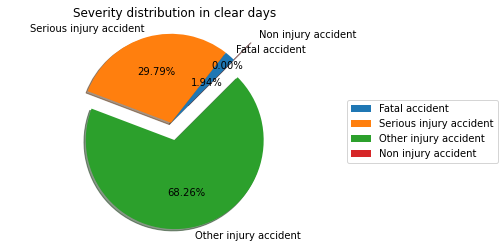

In [94]:
# Generate a pie plot showing the distribution of severity of accidents in clear days 
clear_days_df2 = clear_days_df[["Total Days by Severity","SEVERITY"]]

labels = ['Fatal accident', 'Serious injury accident', 'Other injury accident ', 'Non injury accident']
explode = (0,0,0.2,0.3)

plt.pie(clear_days_df2['Total Days by Severity'], labels=labels,autopct="%1.2f%%", explode =explode, shadow=True, startangle=45)
plt.axis('equal')
plt.title("Severity distribution in clear days")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [95]:
#filter raining days 
raining_days_df = severity_vs_con_df[severity_vs_con_df["Atmosph Cond Desc"] == 'Raining']
raining_days_df

,Atmosph Cond Desc,SEVERITY,Total Days by Severity
13,Raining,1,92
14,Raining,2,1796
15,Raining,3,4403


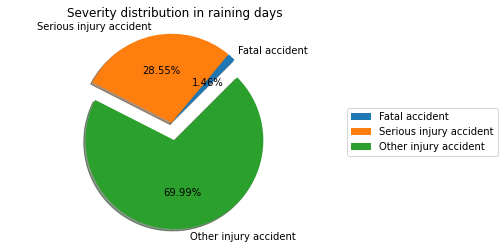

In [98]:
# Generate a pie plot showing the distribution of severity of accidents in clear days 
raining_days_df2 = raining_days_df[["Total Days by Severity","SEVERITY"]]

labels = ['Fatal accident', 'Serious injury accident', 'Other injury accident ']
explode = (0,0,0.2)

plt.pie(raining_days_df2['Total Days by Severity'], labels=labels,autopct="%1.2f%%", explode =explode, shadow=True, startangle=45)
plt.axis('equal')
plt.title("Severity distribution in raining days")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [107]:
accident_type_vs_con = summary_df.groupby(['Atmosph Cond Desc','Accident Type Desc'], as_index = False)["ACCIDENT_NO"].count()
accident_type_vs_con

,Atmosph Cond Desc,Accident Type Desc,ACCIDENT_NO
0,Clear,Collision with a fixed object,7570
1,Clear,Collision with vehicle,32782
2,Clear,Fall from or in moving vehicle,287
3,Clear,No collision and no object struck,1568
4,Clear,Other accident,40
...,...,...,...
57,Strong winds,Other accident,2
58,Strong winds,Struck Pedestrian,59
59,Strong winds,Struck animal,6
60,Strong winds,Vehicle overturned (no collision),53


In [108]:
clear_days_typr_df = accident_type_vs_con[accident_type_vs_con["Atmosph Cond Desc"] == 'Clear']
clear_days_typr_df

,Atmosph Cond Desc,Accident Type Desc,ACCIDENT_NO
0,Clear,Collision with a fixed object,7570
1,Clear,Collision with vehicle,32782
2,Clear,Fall from or in moving vehicle,287
3,Clear,No collision and no object struck,1568
4,Clear,Other accident,40
5,Clear,Struck Pedestrian,4321
6,Clear,Struck animal,470
7,Clear,Vehicle overturned (no collision),2106
8,Clear,collision with some other object,473


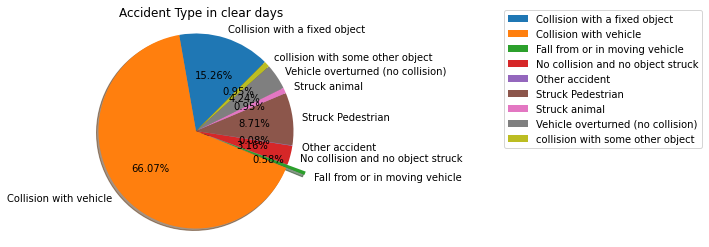

In [128]:
clear_days_typr_df2 = clear_days_typr_df[["Accident Type Desc","ACCIDENT_NO"]]

labels = ['Collision with a fixed object', 'Collision with vehicle', 'Fall from or in moving vehicle', 'No collision and no object struck','Other accident','Struck Pedestrian',
            'Struck animal','Vehicle overturned (no collision)','collision with some other object']
explode = (0,0,0.2,0,0,0,0,0,0)

plt.pie(clear_days_typr_df2['ACCIDENT_NO'], labels=labels,autopct="%1.2f%%", explode =explode, shadow=True, startangle=45)
plt.axis('equal')
plt.title("Accident Type in clear days")
plt.legend(loc='lower center', bbox_to_anchor=(1.7, 0.4))
plt.show()

In [129]:
raining_days_typr_df = accident_type_vs_con[accident_type_vs_con["Atmosph Cond Desc"] == 'Raining']
raining_days_typr_df

,Atmosph Cond Desc,Accident Type Desc,ACCIDENT_NO
32,Raining,Collision with a fixed object,1581
33,Raining,Collision with vehicle,3352
34,Raining,Fall from or in moving vehicle,37
35,Raining,No collision and no object struck,287
36,Raining,Other accident,1
37,Raining,Struck Pedestrian,465
38,Raining,Struck animal,44
39,Raining,Vehicle overturned (no collision),441
40,Raining,collision with some other object,83


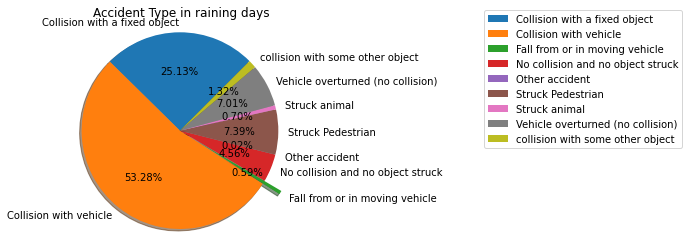

In [130]:
raining_days_typr_df2 = raining_days_typr_df[["Accident Type Desc","ACCIDENT_NO"]]

labels = ['Collision with a fixed object', 'Collision with vehicle', 'Fall from or in moving vehicle', 'No collision and no object struck','Other accident','Struck Pedestrian',
            'Struck animal','Vehicle overturned (no collision)','collision with some other object']
explode = (0,0,0.2,0,0,0,0,0,0)

plt.pie(raining_days_typr_df2['ACCIDENT_NO'], labels=labels,autopct="%1.2f%%", explode =explode, shadow=True, startangle=45)
plt.axis('equal')
plt.title("Accident Type in raining days")
plt.legend(loc='lower center', bbox_to_anchor=(1.7, 0.4))
plt.show()

In [131]:
#strong wind 
strongwind_days_typr_df = accident_type_vs_con[accident_type_vs_con["Atmosph Cond Desc"] == 'Strong winds']
strongwind_days_typr_df

,Atmosph Cond Desc,Accident Type Desc,ACCIDENT_NO
53,Strong winds,Collision with a fixed object,182
54,Strong winds,Collision with vehicle,430
55,Strong winds,Fall from or in moving vehicle,1
56,Strong winds,No collision and no object struck,44
57,Strong winds,Other accident,2
58,Strong winds,Struck Pedestrian,59
59,Strong winds,Struck animal,6
60,Strong winds,Vehicle overturned (no collision),53
61,Strong winds,collision with some other object,62


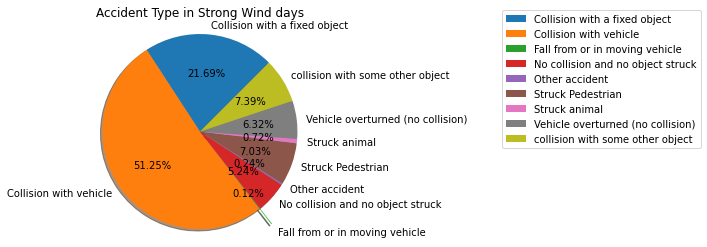

In [132]:
strongwind_days_typr_df2 = strongwind_days_typr_df[["Accident Type Desc","ACCIDENT_NO"]]

labels = ['Collision with a fixed object', 'Collision with vehicle', 'Fall from or in moving vehicle', 'No collision and no object struck','Other accident','Struck Pedestrian',
            'Struck animal','Vehicle overturned (no collision)','collision with some other object']
explode = (0,0,0.2,0,0,0,0,0,0)

plt.pie(strongwind_days_typr_df2['ACCIDENT_NO'], labels=labels,autopct="%1.2f%%", explode =explode, shadow=True, startangle=45)
plt.axis('equal')
plt.title("Accident Type in Strong Wind days")
plt.legend(loc='lower center', bbox_to_anchor=(1.7, 0.4))
plt.show()